In [1]:
#installing libraries
!pip install factor_analyzer
!pip3 install stemming
!pip install simpledorff

You should consider upgrading via the '/Users/valeria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/valeria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/valeria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
#import all libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
#### START DATA PREPARATION AND CLEANING #####

In [4]:
#reading datasets from each Qualtrics survey
initial = pd.read_csv (r'/Users/valeria/Desktop/Pretest/InitialSurvey.csv')
data_day1 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day1.csv')
data_day2 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day2.csv')
data_day3 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day3.csv')
data_day4 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day4.csv')
data_day5 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day5.csv')
debrief = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Debrief.csv')

In [5]:
#import debrief with multiple columns with same id 
#(this occurs because not all users answer to all questions, so I need to create a loop for adding all columns with dif index)
cols=pd.Series(debrief.columns)
for dup in debrief.columns[debrief.columns.duplicated(keep=False)]: 
    cols[debrief.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(debrief.columns.get_loc(dup).sum())]
                                    )
debrief.columns=cols

In [6]:
#verify the columns in the debrief to rename them later
debrief.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', '1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '2_1', '2_2', '2_3', '2_4', '2_5',
       '3', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '5', '6',
       '7', '2_1.1', '2_2.1', '2_3.1', '2_4.1', '2_5.1', '3.1', '4_1.1',
       '4_2.1', '4_3.1', '4_4.1', '4_5.1', '4_6.1', '4_7.1', '4_8.1', '5.1',
       '6.1', '7.1', '2_1.2', '2_2.2', '2_3.2', '2_4.2', '2_5.2', '3.2',
       '4_1.2', '4_2.2', '4_3.2', '4_4.2', '4_5.2', '4_6.2', '4_7.2', '4_8.2',
       '5.2', '6.2', '7.2', 'FB', 'GA', 'NOS', 'tid', 'LoginID', 'ScreenGA',
       'ScreenFB', 'ScreenNOS'],
      dtype='object')

In [7]:
#create general dataframes with login IDs, and starting dates
initial = initial.filter(['Start Date','LoginID', 'GA', 'NOS', 'FB', '2', '3', '4'], axis = 1)
df_d1 = data_day1.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d2 = data_day2.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d3 = data_day3.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d4 = data_day4.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d5 = data_day5.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
debrief = debrief.filter(['Start Date','LoginID','1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '2_1', '2_2', '2_3', '2_4', '2_5',
       '3', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '5', '6',
       '7', '2_1.1', '2_2.1', '2_3.1', '2_4.1', '2_5.1', '3.1', '4_1.1',
       '4_2.1', '4_3.1', '4_4.1', '4_5.1', '4_6.1', '4_7.1', '4_8.1', '5.1',
       '6.1', '7.1', '2_1.2', '2_2.2', '2_3.2', '2_4.2', '2_5.2', '3.2',
       '4_1.2', '4_2.2', '4_3.2', '4_4.2', '4_5.2', '4_6.2', '4_7.2', '4_8.2',
       '5.2', '6.2', '7.2'], axis = 1)

In [8]:
#cleaning data because it has the question and other variables that I don't need for the dataframes
#run twice before deleting the first two rows
initial = initial.iloc[1: , :]
initial = initial.iloc[1: , :]

In [9]:
#cleaning data
#run twice before deleting the first two rows
debrief = debrief.iloc[1: , :]
debrief = debrief.iloc[1: , :]
#run twice before deleting the first row
df_d1 = df_d1.iloc[1: , :]
df_d1 = df_d1.iloc[1: , :]
#run twice before deleting the first row
df_d2 = df_d2.iloc[1: , :]
df_d2 = df_d2.iloc[1: , :]
#run twice before deleting the first row
df_d3 = df_d3.iloc[1: , :]
df_d3 = df_d3.iloc[1: , :]
#run twice before deleting the first row
df_d4 = df_d4.iloc[1: , :]
df_d4 = df_d4.iloc[1: , :]
#run twice before deleting the first row
df_d5 = df_d5.iloc[1: , :]
df_d5 = df_d5.iloc[1: , :]

In [10]:
#removing duplicates in the LoginID "probably will only happen in pretest"? 

initial = initial.drop_duplicates(subset=['LoginID'],keep='first')
debrief = debrief.drop_duplicates(subset=['LoginID'],keep='first')
#droping all duplicates
df_d1 = df_d1.drop_duplicates(subset=['LoginID'],keep='first')
df_d1
df_d2 = df_d2.drop_duplicates(subset=['LoginID'],keep='first')
df_d2
df_d3 = df_d3.drop_duplicates(subset=['LoginID'],keep='first')
df_d3
df_d4 = df_d4.drop_duplicates(subset=['LoginID'],keep='first')
df_d4
df_d5 = df_d5.drop_duplicates(subset=['LoginID'],keep='first')
df_d5



,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9
2,vale,0,0,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0,0,0
6,1902,Formatie,Prinsjesdag,Oranjevrouwen,Afghanisatan,Mallorca aso jongeren,"Rutte wil dat groenlinks, pvda en christenunie...",Nederlanders geven voor eerst meer uit dan voo...,Nieuwe getuigen mallorca zaak,Ajax 0-5 gewonnen,Oranje vrouwen 0-2 gewonnen
7,2577,CoronaCheck,Housing shortage,pollution,Unemployment,COVID cases,Unemployment,Housing shortage,COVID,Pollution,Chip shortage in tech
8,2370,COVID-19,Housing,Environment,Crime,Unemployment,Afghan crisis,Covid-19,environement,Australia's earthquake,la parma volcanic activity
9,2229,Covid-Restriction,Racism,Global Warming,Extinction of the cultural sector,Job vacancy,Covid-Restrictions,Global Warning,Afghanistan,Vacine protest,Inequality due to Covid
10,4626,Formatie,Begroting,Afghanistan,-,-,Formatie,Afghanistan,Begroting,-,-
11,3813,Kabinet formatie,Corona maatregelen,Vulkaanuitbarsting la palma,-,-,Afwezigheid Kaag,Einde van Koeman bij Barcalona?,Forse prijsstijging energie,Arrestatie handlanger Taghi,-
12,3033,New update on CoronaCheck app,The Netherlands' new travel rules,Primary schools no longer have to send the who...,It is still unclear if Dutch citizens who are ...,More than 50000 people become Dutch in 2020,Italy and the US increases vaccine donation fo...,France stepped in into the US - Australia subm...,The global COVID infected number has fallen to...,China's plan to reduce CO2 emission,Angela Merkel's about the leave the house in t...
13,1792,Housing market prices,Racism,Sustainable food expensiveness,Drug trafficking,Negativity for Corona pass,"The Netherlands home prices up 18%, biggest in...",Court says that border checks on the basis of ...,Spending on sustainable food rises 20%,Drugs crime costs society up to €4.1bn,Protest march against Corona pass happening in...


In [11]:
#drop the items that do not have a loginID or that do not answer debrief survey
#then fill with 0 the na for the debrief because not all questions were answered
initial.dropna(subset = ["LoginID"], inplace=True)
debrief.dropna(axis=1, how='all')
initial = initial.fillna(0)
debrief = debrief.fillna(0)
print(initial)

   LoginID GA NOS FB   2                          3  \
3     3258  4   4  2  24                     Female   
4     3033  0   0  5  20                     Female   
5     2032  0   0  2  23                     Female   
6     1714  0   4  0  20                     Female   
7     3106  0   0  2  25                       Male   
8     1930  0   2  2   0                     Female   
9     2577  0   0  3  19                     Female   
10    4626  0   5  0  19                       Male   
11    1928  0   5  5  22                     Female   
12    1902  0   2  4  22                     Female   
13    2178  0   0  2  18                     Female   
14    1794  0   2  0  18                     Female   
15    1942  2   2  2  17                       Male   
16    1600  0   3  0  22  Non-binary / third gender   
17    1647  0   0  1  21                     Female   
18    3683  3   0  0  19                     Female   
19    4056  0   2  1  19                     Female   
20    2370

In [12]:
#check the data for the debrief
debrief

,LoginID,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_1,2_2,...,4_2.2,4_3.2,4_4.2,4_5.2,4_6.2,4_7.2,4_8.2,5.2,6.2,7.2
2,1000,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1902,Neither agree nor disagree - 4,Agree -6,Somewhat agree -5,Agree -6,Somewhat disagree - 3,Disagree - 2,Strongly disagree - 1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2577,Neither agree nor disagree - 4,Somewhat disagree - 3,Neither agree nor disagree - 4,Disagree - 2,Somewhat disagree - 3,Somewhat agree -5,Somewhat agree -5,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2370,Somewhat agree -5,Somewhat agree -5,Somewhat agree -5,Disagree - 2,Somewhat disagree - 3,Somewhat agree -5,Agree -6,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4626,Agree -6,Agree -6,Neither agree nor disagree - 4,Disagree - 2,Neither agree nor disagree - 4,Neither agree nor disagree - 4,Somewhat agree -5,0,0,...,Slightly too little - 3,Slightly too much - 5,Neither too much nor too little - 4,Slightly too much - 5,Slightly too much - 5,Neither too much nor too little - 4,Moderately too much - 6,Neither agree nor disagree - 4,Neither agree nor disagree - 4,Never - 1


In [13]:
#droping all na from issues
df_d1 = df_d1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d2 = df_d2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d3 = df_d3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d4 = df_d4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d5 = df_d5.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [14]:
#creating new datasets for each issue day per day to later concate them and check word frequencies
#the first number indicates the question, the second number the rank notice that issue 4 and 5 
#are wrongly labbeled as 8 and 9 (the error comes from qualtrics), but are later renamed
issues1 = df_d1.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues2 = df_d2.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues3 = df_d3.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues4 = df_d4.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues5 = df_d5.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)

In [15]:
frames = [issues1, issues2, issues3, issues4, issues5]
#concat frames to create one data set with all issues per day
issues = pd.concat(frames)
issues = issues.drop_duplicates()
issues = issues.dropna()
issues

,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9
2,4626,Afghanistan,Formatie,Dividentbelasting,-,-,Formatie,Vrouwenvoetbal,Afghanistan,-,-
4,3813,kabinet formatie,steekincident almelo,griep,oranjeleeuwinnen,motie van afkeuring,kabinet formatie,steekincident almelo,coronaprotest,drone aanval van VS,griep
5,4293,aging population,lack of political stability,pollution,undesirable housing market,life costs,covid,racism,politics,crime rate,taxes
7,1714,The new corona measurements,Tata Steel frabric health issue,Minsiter of foreign affairs resigns,Drug traffic,disruption of train traffic,New corona measurements,Climate change,Afghanistan crisis,Abuse US gymnasitic team,MET gala
9,2362,Housing crisis,Covid measures,Vaccine passport,Afghanistan conflict,Climate change,Covid,Afghanistan,Climate change,Haiti earthquake refugees,Conflict in south china sea
10,1792,Housing market,Healthcare system,Unemployment for internationals,Sexual assault,Environment,Corona measures,International students struggling to find housing,Healthcare sector carelessness,Drug traffickers teaching children,Nazi stunts in Urk
13,3033,New corona pass rules,Travel to the Netherlands under new COVID rules,Amsterdam bridge and tunnel plan,Rutte visit to the UK,Assessment of work-life balance in the Netherl...,Corona virus new measures around the world,Corona virus vaccine,After Taliban took over Afghanistan,US Australia new deal,New LGBTQ+ right legislation in EU
2,1928,Corona,Tweede kamer,Europa,Milieu,Sigrid kaag,Staatsschuld,Coronaboetes,Sigrid kaag,Ruimteschip dat terugkeert,Corona
3,1902,Formatie,Afghanistan,Opstappen Kaag & Bijleveld,Max Verstappen F1,Belastingaffaire,Ajax 9-0,Formatieweekend,Opstappen Sigrid Kaag,Opstappen Ank Bijleveld,11.000 boetes mondkapjes
4,4626,coronapas,Afghanistan,formatie,-,-,corona,formatie,Afghanistan,-,-


In [16]:
#drop testing data (pretest only)
issues.drop(index=issues[issues['LoginID'] == 'vale'].index, inplace=True)
issues.drop(index=issues[issues['LoginID'] == '1000'].index, inplace=True)

In [17]:
#Check data
issues

,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9
5,4293,aging population,lack of political stability,pollution,undesirable housing market,life costs,covid,racism,politics,crime rate,taxes
7,1714,The new corona measurements,Tata Steel frabric health issue,Minsiter of foreign affairs resigns,Drug traffic,disruption of train traffic,New corona measurements,Climate change,Afghanistan crisis,Abuse US gymnasitic team,MET gala
9,2362,Housing crisis,Covid measures,Vaccine passport,Afghanistan conflict,Climate change,Covid,Afghanistan,Climate change,Haiti earthquake refugees,Conflict in south china sea
10,1792,Housing market,Healthcare system,Unemployment for internationals,Sexual assault,Environment,Corona measures,International students struggling to find housing,Healthcare sector carelessness,Drug traffickers teaching children,Nazi stunts in Urk
13,3033,New corona pass rules,Travel to the Netherlands under new COVID rules,Amsterdam bridge and tunnel plan,Rutte visit to the UK,Assessment of work-life balance in the Netherl...,Corona virus new measures around the world,Corona virus vaccine,After Taliban took over Afghanistan,US Australia new deal,New LGBTQ+ right legislation in EU
3,1902,Formatie,Afghanistan,Opstappen Kaag & Bijleveld,Max Verstappen F1,Belastingaffaire,Ajax 9-0,Formatieweekend,Opstappen Sigrid Kaag,Opstappen Ank Bijleveld,11.000 boetes mondkapjes
5,2370,Covid 19,housing,environment,crime,unemployment,Afghanistan refugee crisis,COVID-19,environment,income inequality,discrimination
6,1792,Housing market crisis,Foreigners cannot find a job,Poor healthcare system,Sexual assault,Corona measures,Nazi stunt in Urk,Non-EU visitors needing daily tests,Foreign students can't find a place to live,Drug traffickers training children to work,Museums asking for financial support
8,1714,Corona measurements,Tata steel fabric health issues,Minister of foreins affairs resigns,Train trafic disruptions,Drug traffic,Corona measurements,Climate change,Afghanistan crisis,US gymnastic team abuse,MET gala
11,4293,racism,weed,unstable political system,poor housing market,high life cost,high taxes,life quality,politics,environmental issues,high crime rate


In [18]:
#Rename columns by day, question, issue set 

In [19]:
initial.rename(columns={'2': 'Age','3': 'Gender', '4': 'Education'}, inplace=True)
#reindexing columns
debrief.rename(columns={'LoginID': 'LoginID',
                        '1_1':'GMT1','1_2':'GMT2',
                        '1_3':'GMT3',
                        '1_4':'GMT4','1_5':'GMT5',
                        '1_6':'GMT6','1_7':'GMT7',
                        '2_1':'TGA1','2_2':'TGA2',
                        '2_3':'TGA3','2_4':'TGA4',
                        '2_5':'TGA5','3':'AGA1',
                        '4_1': 'AGA2', '4_2': 'AGA3',
                        '4_3': 'AGA4', '4_4':'AGA5',
                        '4_5':'AGA6',
                        '4_6':'AGA7',
                        '4_7':'AGA8',
                        '4_8':'AGA9', '5':'PLDGA1',
                        '6':'PLDGA2', '7':'CUSGA',
                        '2_1.1':'TFB1', '2_2.1':'TFB2', '2_3.1':'TFB3', '2_4.1':'TFB4',
                        '2_5.1':'TFB5', '3.1':'AFB1', '4_1.1':'AFB2', '4_2.1':'AFB3',
                        '4_3.1':'AFB4', '4_4.1':'AFB5', '4_5.1':'AFB6', '4_6.1':'AFB7',
                        '4_7.1':'AFB8', '4_8.1':'AFB9', '5.1':'PLDFB1',
                        '6.1':'PLDFB2', '7.1':'CUSFB',
                        '2_1.2':'TNOS1', '2_2.2':'TNOS2', '2_3.2':'TNOS3',
                        '2_4.2':'TNOS4', '2_5.2':'TNOS5', '3.2':'ANOS1',
                        '4_1.2':'ANOS2', '4_2.2':'ANOS3', '4_3.2':'ANOS4', '4_4.2':'ANOS5',
                        '4_5.2':'ANOS6',
                        '4_6.2':'ANOS7', '4_7.2':'ANOS8', '4_8.2':'ANOS9',
                        '5.2':'PLDNOS1', '6.2':'PLDNOS2', '7.2':'CUSNOS',
                        }, 
                     index={'1': '1',
                        '2':'2','3':'3',
                        '4':'4',
                        '5':'5'}, inplace=True)

In [20]:
#export debrief and initial survey to verify that dataframes have the necessary data
debrief.to_csv('debrief_test.csv', index=False)
initial.to_csv('initial_test.csv', index=False)

In [21]:
#here all columns per day are re-labelled.
#The first number indicates the day, the second the question, the third the rank
#e.g. day 1 question 1 rank 1 = 1_1_1 ... day 4 question 2 rank 2 = 4_2_2

In [22]:
df_d1.rename(columns={"1_1": "1_1_1", "1_2": "1_1_2", "1_3": "1_1_3","1_8": "1_1_4","1_9": "1_1_5","2_1": "1_2_1","2_2": "1_2_2","2_3": "1_2_3","2_8": "1_2_4","2_9": "1_2_5" }, inplace=True)

In [23]:
df_d2.rename(columns={"1_1": "2_1_1", "1_2": "2_1_2", "1_3": "2_1_3","1_8": "2_1_4","1_9": "2_1_5","2_1": "2_2_1","2_2": "2_2_2","2_3": "2_2_3","2_8": "2_2_4","2_9": "2_2_5" }, inplace=True)

In [24]:
df_d3.rename(columns={"1_1": "3_1_1", "1_2": "3_1_2", "1_3": "3_1_3","1_8": "3_1_4","1_9": "3_1_5","2_1": "3_2_1","2_2": "3_2_2","2_3": "3_2_3","2_8": "3_2_4","2_9": "3_2_5" }, inplace=True)

In [25]:
df_d4.rename(columns={"1_1": "4_1_1", "1_2": "4_1_2", "1_3": "4_1_3","1_8": "4_1_4","1_9": "4_1_5","2_1": "4_2_1","2_2": "4_2_2","2_3": "4_2_3","2_8": "4_2_4","2_9": "4_2_5" }, inplace=True)

In [26]:
df_d5.rename(columns={"1_1": "5_1_1", "1_2": "5_1_2", "1_3": "5_1_3","1_8": "5_1_4","1_9": "5_1_5","2_1": "5_2_1","2_2": "5_2_2","2_3": "5_2_3","2_8": "5_2_4","2_9": "5_2_5" }, inplace=True)

In [27]:
#replacing values for numbers in debrief survey (only pretest)
#For real survey verify this item because I already added the recoding in qualtrics.
debrief = debrief.replace(['Agree -6'],6)
debrief = debrief.replace(['Somewhat agree -5'],5)
debrief = debrief.replace(['Neither agree nor disagree - 4'],4)
debrief = debrief.replace(['Somewhat disagree - 3'],3)
debrief = debrief.replace(['Far too little - 1'],1)
debrief = debrief.replace(['Moderately too little - 2'],2)
debrief = debrief.replace(['Slightly too little - 3'],3)
debrief = debrief.replace(['Slightly too little attention - 3'],3)
debrief = debrief.replace(['Slightly too much attention - 5'],5)
debrief = debrief.replace(['Neither too much nor too little attention - 4'],4)
debrief = debrief.replace(['Moderately too much attention - 6'],6)
debrief = debrief.replace(['Agree - 6'],6)
debrief = debrief.replace(['Never - 1'],1)
debrief = debrief.replace(['Disagree - 2'],2)
debrief = debrief.replace(['Strongly disagree - 1'],1)
debrief = debrief.replace(['Somewhat agree - 5'],5)
debrief = debrief.replace(['About half of the time - 4'],4)
debrief = debrief.replace(['Neither too much nor too little - 4'],4)
debrief = debrief.replace(['Slightly too much - 5'],5)
debrief = debrief.replace(['Moderately too much - 6'],6)
debrief = debrief.replace(['Usually - 5'],5)
debrief = debrief.replace(['Neither agree of disagree - 4'],4)

debrief.describe()

,GMT1,GMT2,GMT3,GMT4,GMT5,GMT6,GMT7,TGA1,TGA2,TGA3,...,ANOS3,ANOS4,ANOS5,ANOS6,ANOS7,ANOS8,ANOS9,PLDNOS1,PLDNOS2,CUSNOS
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4.80000,5.000000,4.600000,3.400000,3.600000,4.20000,4.400000,0.0,0.0,0.0,...,0.600000,1.000000,0.800000,1.000000,1.000000,0.800000,1.200000,0.800000,0.800000,0.200000
std,0.83666,1.224745,0.547723,1.949359,0.894427,1.30384,1.949359,0.0,0.0,0.0,...,1.341641,2.236068,1.788854,2.236068,2.236068,1.788854,2.683282,1.788854,1.788854,0.447214
min,4.00000,3.000000,4.000000,2.000000,3.000000,2.00000,1.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,5.000000,4.000000,2.000000,3.000000,4.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.00000,5.000000,5.000000,2.000000,3.000000,5.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.00000,6.000000,5.000000,5.000000,4.000000,5.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.00000,6.000000,5.000000,6.000000,5.000000,5.00000,6.000000,0.0,0.0,0.0,...,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,6.000000,4.000000,4.000000,1.000000


In [80]:
#also recoding for initial survey 
#verify if it is necessary for the real survey
initial = initial.replace(['Male'],0)
initial = initial.replace(['Female'],1)
initial = initial.replace(['Non-binary / third gender'],2)
initial = initial.replace(['None or primary education'],1)
initial = initial.replace(['HAVO or VWO (4th, 5th or 6th class) / HBS / MMS (high school)'],2)
initial = initial.replace(['HBO (except HBO master) / WO candidate or WO bachelor'],3)

In [82]:
#https://stackoverflow.com/questions/58308972/create-a-new-column-with-three-conditions-using-np-where
#creating groups based on conditions. (verify the minium number for belonging to a group, is 1 enough?. 
#It is also necessary to check it during soft quotas in the real test
pd.Series(initial)
conditionsGA = [ initial['GA'].astype(int).between(2,5) &
                 initial['NOS'].astype(int).between(1,2) &
                 initial['FB'].astype(int).between(1,2)
               ]
conditionsFB = [ initial['FB'].astype(int).between(2,5) &
                 initial['NOS'].astype(int).between(1,2) &
                 initial['GA'].astype(int).between(1,2)
               ]
conditionsNOS = [ initial['NOS'].astype(int).between(2,5) &
                 initial['FB'].astype(int).between(1,2) &
                 initial['GA'].astype(int).between(1,2)
               ]

GA = ['Google Assistant']
FB = ['Facebook']
NOS = ['NOS']

initial['channel'] = np.where(conditionsGA, GA, 'Else')
initial['channel'] = np.where(conditionsFB, FB)
initial['channel'] = np.where(conditionsNOS, NOS)
initial

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
#adding the days to all issues and creating a new dataframe called issuesID for making a new dataset later
frames = [issues1, issues2, issues3, issues4]
day1 = "1"
issues1['Day'] = "1"
issues2['Day'] = "2"
issues3['Day'] = "3"
issues4['Day'] = "4"
issues5['Day'] = "5"

#appending data
issuesID = initial.append([issues1,issues2,issues3,issues4, issues5])
issuesID

,LoginID,GA,NOS,FB,Age,Gender,Education,group,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9,Day
3,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3033,0,0,5,20,1.0,2.0,Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1714,0,4,0,20,1.0,2.0,NOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Covid-Restriction,Racism,Global Warming,Extinction of the cultural sector,Job vacancy,Covid-Restrictions,Global Warning,Afghanistan,Vacine protest,Inequality due to Covid,5
10,4626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Formatie,Begroting,Afghanistan,-,-,Formatie,Afghanistan,Begroting,-,-,5
11,3813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kabinet formatie,Corona maatregelen,Vulkaanuitbarsting la palma,-,-,Afwezigheid Kaag,Einde van Koeman bij Barcalona?,Forse prijsstijging energie,Arrestatie handlanger Taghi,-,5
12,3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New update on CoronaCheck app,The Netherlands' new travel rules,Primary schools no longer have to send the who...,It is still unclear if Dutch citizens who are ...,More than 50000 people become Dutch in 2020,Italy and the US increases vaccine donation fo...,France stepped in into the US - Australia subm...,The global COVID infected number has fallen to...,China's plan to reduce CO2 emission,Angela Merkel's about the leave the house in t...,5


In [31]:
#grouping the datasets by login ID and I will append them later to have a nice dataframe
issuesID.groupby('LoginID').first()

,GA,NOS,FB,Age,Gender,Education,group,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9,Day
LoginID,,,,,,,,,,,,,,,,,,
1000,None,None,None,None,NaN,NaN,None,0,0,0,0,0,0,0,0,0,0,5
1017,0,5,4,19,1.0,2.0,NOS,None,None,None,None,None,None,None,None,None,None,None
1122,0,0,0,21,1.0,2.0,0,None,None,None,None,None,None,None,None,None,None,None
1292,0,2,2,20,1.0,1.0,NOS,None,None,None,None,None,None,None,None,None,None,None
1416,1,3,4,22,1.0,3.0,Google Assistant,None,None,None,None,None,None,None,None,None,None,None
1502,0,2,0,22,1.0,1.0,NOS,None,None,None,None,None,None,None,None,None,None,None
1600,0,3,0,22,2.0,2.0,NOS,None,None,None,None,None,None,None,None,None,None,None
1634,0,0,1,19,1.0,2.0,Facebook,None,None,None,None,None,None,None,None,None,None,None
1647,0,0,1,21,1.0,1.0,Facebook,None,None,None,None,None,None,None,None,None,None,None


In [32]:
#here I merge the issues with the initial dataset to have all ids, groups etc from each individual
issuesID1 = pd.merge(initial, issues1, how='outer', on="LoginID")
issuesID2 = pd.merge(initial, issues2, how='outer', on="LoginID")
issuesID3 = pd.merge(initial, issues3, how='outer', on="LoginID")
issuesID4 = pd.merge(initial, issues4, how='outer', on="LoginID")
issuesID5 = pd.merge(initial, issues5, how='outer', on="LoginID")

In [33]:
#After merging all issues with initial dataset I append them to the first dataset.
#This is a way to avoid having multiple empty columns without the info of the participant
issuesIDALL = issuesID1.append([issuesID2, issuesID3, issuesID4, issuesID5])

In [34]:
#here I drop the rows that were only used for testing (the ones that do not have a group and thus are categorized as 0)
issuesIDALL.drop(issuesIDALL.loc[issuesIDALL['group']=='0'].index, inplace=True)

In [35]:
#export the dataframe to verify the data is organized
issuesIDALL.to_csv('issuesIDALL.csv', index=False)

In [36]:
#create data frame for debrief

In [37]:
#this is a new data frame with the new variable names
#the labels are based on the variables 
#GMT = GENERALIZED MEDIA TRUST, 
#TGA = Trust Google Assistant, 
#AGA = Attention Google Assistant, 
#PLD = Perceived Lack Diversity ..,
#Cus = Customization ...
debrief_statistical = debrief[['GMT1','GMT2',
                        'GMT3',
                        'GMT4','GMT5',
                        'GMT6','GMT7',
                        'TGA1','TGA2',
                        'TGA3','TGA4',
                        'TGA5','AGA1',
                        'AGA2','AGA3',
                        'AGA4','AGA5',
                        'AGA6',
                        'AGA7',
                       'AGA8',
                        'AGA9','PLDGA1',
                        'PLDGA2', 'CUSGA',
                        'TFB1', 'TFB2', 'TFB3', 'TFB4',
                        'TFB5', 'AFB1', 'AFB2', 'AFB3',
                        'AFB4', 'AFB5', 'AFB6', 'AFB7',
                        'AFB8', 'AFB9', 'PLDFB1',
                        'PLDFB2','CUSFB',
                        'TNOS1','TNOS2','TNOS3',
                        'TNOS4','TNOS5', 'ANOS1',
                        'ANOS2','ANOS3', 'ANOS4','ANOS5',
                        'ANOS6',
                       'ANOS7','ANOS8', 'ANOS9',
                        'PLDNOS1','PLDNOS2','CUSNOS']].copy()

In [38]:
#CREATE UNIQUE VARIABLES (MEANS) FROM THE MULTIPLE VARIABLES
debrief_statistical['GMT_MEAN'] = debrief_statistical[['GMT1','GMT2','GMT3','GMT4','GMT5','GMT6','GMT7']].mean(axis=1)
debrief_statistical['TGA_MEAN'] = debrief_statistical[['TGA1','TGA2','TGA3','TGA4','TGA5']].mean(axis=1)
debrief_statistical['AGA_MEAN'] = debrief_statistical[['AGA1','AGA2','AGA3','AGA4','AGA5','AGA6','AGA7','AGA8','AGA9']].mean(axis=1)
debrief_statistical['PLDGA_MEAN'] = debrief_statistical[['PLDGA1','PLDGA2']].mean(axis=1)
debrief_statistical['TFB_MEAN'] = debrief_statistical[['TFB1', 'TFB2', 'TFB3', 'TFB4','TFB5']].mean(axis=1)
debrief_statistical['AFB_MEAN'] = debrief_statistical[['AFB1', 'AFB2', 'AFB3','AFB4', 'AFB5', 'AFB6', 'AFB7','AFB8', 'AFB9']].mean(axis=1)
debrief_statistical['PLDFB_MEAN'] = debrief_statistical[['PLDFB1', 'PLDFB2']].mean(axis=1)
debrief_statistical['TNOS_MEAN'] = debrief_statistical[['TNOS1','TNOS2','TNOS3','TNOS4','TNOS5']].mean(axis=1)
debrief_statistical['ANOS_MEAN'] = debrief_statistical[['ANOS1','ANOS2','ANOS3', 'ANOS4','ANOS5','ANOS6','ANOS7','ANOS8','ANOS9']].mean(axis=1)
debrief_statistical['PLDNOS_MEAN'] = debrief_statistical[['PLDNOS1','PLDNOS2']].mean(axis=1)

In [39]:
#making an array of General Media Trust for testing factor analysis 
#the factor analysis gives an error bc I have a lot of missing data on the pretest 
#At this point the factor analysis for the debrief is moved to R to omit NAs
GTM = debrief_statistical[['GMT1','GMT2','GMT3','GMT4','GMT5','GMT6','GMT7']]
GTM.to_numpy()

array([[5, 5, 5, 5, 5, 5, 5],
       [4, 6, 5, 6, 3, 2, 1],
       [4, 3, 4, 2, 3, 5, 5],
       [5, 5, 5, 2, 3, 5, 6],
       [6, 6, 4, 2, 4, 4, 5]])

In [40]:
#factor analysis text (not working bc of missing data)
# factor_debrief = debrief_statistical
# factor_debrief.drop([
#        'GMT_MEAN', 'TGA_MEAN', 'AGA_MEAN', 'PLDGA_MEAN', 'TFB_MEAN',
#        'AFB_MEAN', 'PLDFB_MEAN', 'TNOS_MEAN', 'ANOS_MEAN', 'PLDNOS_MEAN'], axis=1, inplace=True)
# factor_debrief.to_csv('factor_debrief_r.csv', index=False)
# from sklearn.decomposition import FactorAnalysis
# X = factor_debrief
# transformer = FactorAnalysis(n_components=7, random_state=0)
# X_transformed = transformer.fit_transform(X)
# X_transformed.shape
# fit(X)
# pd.plotting.scatter_matrix(debrief_statistical)
# fa = FactorAnalyzer(n_factors = '12', rotation='varimax')
# fa.fit(factor_debrief)

In [41]:
#setting the same index for the data frames with the issues so I can concat them
df_d1.set_index('LoginID')
df_d2.set_index('LoginID')
df_d3.set_index('LoginID')
df_d4.set_index('LoginID')
df_d5.set_index('LoginID')

,5_1_1,5_1_2,5_1_3,5_1_4,5_1_5,5_2_1,5_2_2,5_2_3,5_2_4,5_2_5
LoginID,,,,,,,,,,
vale,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0
1902,Formatie,Prinsjesdag,Oranjevrouwen,Afghanisatan,Mallorca aso jongeren,"Rutte wil dat groenlinks, pvda en christenunie...",Nederlanders geven voor eerst meer uit dan voo...,Nieuwe getuigen mallorca zaak,Ajax 0-5 gewonnen,Oranje vrouwen 0-2 gewonnen
2577,CoronaCheck,Housing shortage,pollution,Unemployment,COVID cases,Unemployment,Housing shortage,COVID,Pollution,Chip shortage in tech
2370,COVID-19,Housing,Environment,Crime,Unemployment,Afghan crisis,Covid-19,environement,Australia's earthquake,la parma volcanic activity
2229,Covid-Restriction,Racism,Global Warming,Extinction of the cultural sector,Job vacancy,Covid-Restrictions,Global Warning,Afghanistan,Vacine protest,Inequality due to Covid
4626,Formatie,Begroting,Afghanistan,-,-,Formatie,Afghanistan,Begroting,-,-
3813,Kabinet formatie,Corona maatregelen,Vulkaanuitbarsting la palma,-,-,Afwezigheid Kaag,Einde van Koeman bij Barcalona?,Forse prijsstijging energie,Arrestatie handlanger Taghi,-
3033,New update on CoronaCheck app,The Netherlands' new travel rules,Primary schools no longer have to send the who...,It is still unclear if Dutch citizens who are ...,More than 50000 people become Dutch in 2020,Italy and the US increases vaccine donation fo...,France stepped in into the US - Australia subm...,The global COVID infected number has fallen to...,China's plan to reduce CO2 emission,Angela Merkel's about the leave the house in t...


In [42]:
###### AT THIS POINT I STOP CREATING DATAFRAMES AND START COUNTING WORDS ######
###### IN THE NEXT LINES I MERGED THE ISSUES TO COUNT WORD FREQUENCIES ######
###### ADDITIONALLY THE WORD FREQUENCIES ARE MEASURED INDEPENDENTLY ######

In [43]:
### SECTION START MANUAL CODING ####

In [44]:

#Create a list of text with all issues separated by commas
# each lines = the issues reported by each individual 
#TODO ADD LABELS TO THE SERIES SO IT IS EASIER CREATE THE SIMILARITY FOR EACH INDIVIDUAL!
listtext = issues['1_1'] + ',' + issues['1_2'] + ',' + issues['1_3'] + ',' + issues['1_8'] + ',' + issues['1_9'] + ',' + issues['2_1'] + ',' + issues['2_2'] + ',' + issues['2_3'] + ',' + issues['2_8'] + ',' + issues['2_9']
listtext



5     aging population,lack of political stability ,...
7     The new corona measurements,Tata Steel frabric...
9     Housing crisis,Covid measures,Vaccine passport...
10    Housing market,Healthcare system,Unemployment ...
13    New corona pass rules,Travel to the Netherland...
3     Formatie,Afghanistan,Opstappen Kaag & Bijlevel...
5     Covid 19,housing,environment,crime,unemploymen...
6     Housing market crisis,Foreigners cannot find a...
8     Corona measurements,Tata steel fabric health i...
11    racism,weed,unstable political system,poor hou...
17    COVID-19 cases,vaccination,refugee,unemploymen...
19    corona,kabinet vormen ,tata steel woonwijk,hui...
20    Corona Regulation,Housing,unemployment,envirom...
21    Corona measurements ,Conditions in refugee cam...
3     Russischr verkiezingen,Poetin meerderheid,Vulk...
5     Corona,Klimaat,Europa,Tweede kamer,Koningshuis...
6     NS international conductors' strike for higher...
7     CoronaCheck,COVID related,unemployment,hou

In [45]:
#get frequencies of all words
# wordcount1 = listtext.str.split(',',expand=True).stack().value_counts()
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
listtext = listtext.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(listtext)


#modify the separator to space and delete issues that do not contain characters
listtext = listtext.str.replace(",", " ")
listtext = listtext.str.replace("-", " ")
listtext

5     aging population,lack political stability ,pol...
7     The new corona measurements,Tata Steel frabric...
9     Housing crisis,Covid measures,Vaccine passport...
10    Housing market,Healthcare system,Unemployment ...
13    New corona pass rules,Travel Netherlands new C...
3     Formatie,Afghanistan,Opstappen Kaag & Bijlevel...
5     Covid 19,housing,environment,crime,unemploymen...
6     Housing market crisis,Foreigners cannot find j...
8     Corona measurements,Tata steel fabric health i...
11    racism,weed,unstable political system,poor hou...
17    COVID-19 cases,vaccination,refugee,unemploymen...
19    corona,kabinet vormen ,tata steel woonwijk,hui...
20    Corona Regulation,Housing,unemployment,envirom...
21    Corona measurements ,Conditions refugee camps,...
3     Russischr verkiezingen,Poetin meerderheid,Vulk...
5     Corona,Klimaat,Europa,Tweede kamer,Koningshuis...
6     NS international conductors' strike higher wag...
7     CoronaCheck,COVID related,unemployment,hou

5     aging population lack political stability  pol...
7     The new corona measurements Tata Steel frabric...
9     Housing crisis Covid measures Vaccine passport...
10    Housing market Healthcare system Unemployment ...
13    New corona pass rules Travel Netherlands new C...
3     Formatie Afghanistan Opstappen Kaag & Bijlevel...
5     Covid 19 housing environment crime unemploymen...
6     Housing market crisis Foreigners cannot find j...
8     Corona measurements Tata steel fabric health i...
11    racism weed unstable political system poor hou...
17    COVID 19 cases vaccination refugee unemploymen...
19    corona kabinet vormen  tata steel woonwijk hui...
20    Corona Regulation Housing unemployment envirom...
21    Corona measurements  Conditions refugee camps ...
3     Russischr verkiezingen Poetin meerderheid Vulk...
5     Corona Klimaat Europa Tweede kamer Koningshuis...
6     NS international conductors' strike higher wag...
7     CoronaCheck COVID related unemployment hou

In [46]:
#get frequencies of all words
# wordcount1 = listtext.str.split(',',expand=True).stack().value_counts()
listtext= listtext.str.lower()
listtext = listtext.map(lambda x: x.rstrip('-19'))
listtext = listtext.map(lambda x: x.rstrip('-19'))
wordcount = listtext.str.split(expand=True).stack().value_counts()
words = pd.DataFrame(wordcount)
words = words.rename(columns={"0": "frequency"})
words['words'] = words.index
words

,0,words
corona,28,corona
covid,25,covid
housing,20,housing
afghanistan,19,afghanistan
crisis,12,crisis
...,...,...
poorer,1,poorer
verstappen,1,verstappen
conductors',1,conductors'
highline,1,highline


<AxesSubplot:>

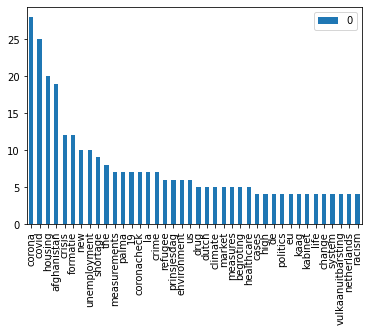

In [47]:
#plot the frequency of words
words.head(40).plot.bar()

In [48]:
issuesIDALL.rename(columns={'1_1': 'MIP1','1_2': 'MIP2','1_3': 'MIP3','1_8': 'MIP4','1_9': 'MIP5' }, inplace=True)

In [49]:
#manual coding to compare
#proof reliable the automated coding is == to compare
#use markdown to explain all explains and justify/remember steps
#word matching
#Here I try to automate the recoding by adding a event when one of the strings contain a sentence
# e.g. corona = COVID19, Protest march against Corona pass happening in the Hague = Corona protests
issuesIDALL['MIP1_R'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP1.str.contains("corona|Corona|griepe"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID_protests",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Nazi stunts|nazi stunts"), "Nazi_stunts",        
                               pd.np.where(issuesIDALL.MIP1.str.contains("Protest of NS train employees|NS international conductors"), "Transportation_protests",        
                                           
                               pd.np.where(issuesIDALL.MIP1.str.contains("system|health care"), "Health_care_system",
                               pd.np.where(issuesIDALL.MIP1.str.contains("New corona pass rules|Corona measurements|corona maatregelen|The Netherlands new travel rules|Niet hele klas thuis bij corona besmetting|Primary schools no longer have to send the whole class home after one student gets infected"), "Corona_measurements",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Coronapas fraud|mogelijke fraude|fraud bij GGD"), "Corona frauds",
                               pd.np.where(issuesIDALL.MIP1.str.contains("facemask"), "Facemasks",
                               pd.np.where(issuesIDALL.MIP1.str.contains("CoronaCheck|coronacheck"), "CoronaCheck",
                               pd.np.where(issuesIDALL.MIP1.str.contains("vaccines|vaccine|Astrazeneca"), "Vaccines",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Tata Steel"), "Tata Steel",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Borstimplantaten"), "Breast_implants",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Economische crisis"), "Economic_crisis",
                               pd.np.where(issuesIDALL.MIP1.str.contains("prinsjesdag|prinsjesdag"), "Prijesdag",
                               pd.np.where(issuesIDALL.MIP1.str.contains("spending plan"), "Spending_plan", 
                               pd.np.where(issuesIDALL.MIP1.str.contains("Unemploymeny|Job vacancy"), "General_unemployment", 
                               pd.np.where(issuesIDALL.MIP1.str.contains("Foreigners cannot find a job|Unemployment for internationals"), "Unemployment_for_foreigners",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Housing|housing|huizen"), "Housing_crisis",
                               pd.np.where(issuesIDALL.MIP1.str.contains("International students struggling to find housing"), "Housing_for_students",
                               pd.np.where(issuesIDALL.MIP1.str.contains("The Netherlands home prices up 18%, the biggest increase in 21 years"), "Housing_prices",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Dutch local authorities are failing to provide enough suitable accommodation for seasonal workers|Local councils are failing to develop enough seasonal worker housing"), "Housing_for_seasonal_workers",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Children refugees reaching the Netherlands"), "Refugees",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Kabinet|kabinet|Wanner de formatie klaar?"), "Kabinet_formatie",
                               pd.np.where(issuesIDALL.MIP1.str.contains("61% of people want a new election instead of minor cabinet formation"), "Kabinet_formatie_preferences",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Kaag & Bijleveld|Afwezigheid Kaag"), "Kaag_resignation",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Public Transport Problems"), "Public_transport_problems",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Low salaries for certain jobs"), "Labor_salaries",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Inequality due to COVID"), "Inequality_due_to_COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("high crime rate"), "Crime_rate",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Drugs crime costs society up to €4.1bn"), "Crime_costs",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Mayors push for tougher approach towards organized crime"), "Crime_measures",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Drug crime"), "Drug_trafficking",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Arrestatie handlanger Taghi"), "International_drug_crime",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Gevonden lichaam USA|Arrest abusive babysitters"), "Crime_in_the_USA",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Nieuwe lavastroom op la palma|Vulkaanuitbarsting la palma"), "La_Palma_volcanic_eruption",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Australia's earthquake"), "Australia's_earthquake",
                               pd.np.where(issuesIDALL.MIP1.str.contains("New LGBTQ+ right legislation in EU"), "LGTBQ_rights",       
                               pd.np.where(issuesIDALL.MIP1.str.contains("Racism"), "Racism",
                               pd.np.where(issuesIDALL.MIP1.str.contains("General elections"), "Election",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Conditions in refugee camps"), "Refugee_conditions",
                               pd.np.where(issuesIDALL.MIP1.str.contains("After the Taliban took over Afghanistan|Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Russischr verkiezingen|Poetin meerderheid"), "Russian_elections", 
                               pd.np.where(issuesIDALL.MIP1.str.contains("German elections|Angela Merkel's about the leave the house in the next election"), "German_elections",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Canadian elections|Trudeau winnaar|Canadese verkiezingen"), "Canadian_elections",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Hong Kong leader defends election"), "Hong_Kong_election",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Australia and US deals"), "US_Australia_new_deal",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Vaccine passport|It is still unclear if Dutch citizens who are vaccinated with AstraZeneca can come to the US"), "Vaccine_Passport",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Italy and the US increases vaccine donation for poorer countries"), "Vaccine_donation",
                               pd.np.where(issuesIDALL.MIP1.str.contains("The Netherlands sent rapid tests to Surinamcountries"), "Rapid_tests_donation",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Climate change, Environment, Global Warning"), "Climate_change",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Steekincident Almelo"), "Traffic_accidents_in_the_Netherlands",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Extinction of the cultural sector"), "Cultural_sector",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Chip shortage in tech"), "Chip_shortage",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Ajax 9-0"), "Ajax_football_games",
                               pd.np.where(issuesIDALL.MIP1.str.contains("oranjeleeuwinnen|Oranje vrouwen"), "Oranje_football_games",
                               pd.np.where(issuesIDALL.MIP1.str.contains("F1"), "Max_Verstappen_F1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("The Emmys 2021"), "Emmys",
                               pd.np.where(issuesIDALL.MIP1.str.contains("The Met Gata"), "MET_Gala",
    
                              "Other")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
 

<ipython-input-49-3980e16539c0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP1_R'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
<ipython-input-49-3980e16539c0>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("corona|Corona|griepe"), "COVID",
<ipython-input-49-3980e16539c0>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID_protests",
<ipython-input-49-3980e16539c0>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where

In [50]:
#manual coding to compare
#proof reliable the automated coding is == to compare
#use markdown to explain all explains and justify/remember steps
#word matching
#Here I try to automate the recoding by adding a event when one of the strings contain a sentence
# e.g. corona = COVID19, Protest march against Corona pass happening in the Hague = Corona protests
issuesIDALL['MIP2_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP2.str.contains("corona|Corona|griepe"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID_protests",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Nazi stunts|nazi stunts"), "Nazi_stunts",        
                               pd.np.where(issuesIDALL.MIP2.str.contains("Protest of NS train employees|NS international conductors"), "Transportation_protests",        
                                           
                               pd.np.where(issuesIDALL.MIP2.str.contains("system|health care"), "Health_care_system",
                               pd.np.where(issuesIDALL.MIP2.str.contains("New corona pass rules|Corona measurements|corona maatregelen|The Netherlands new travel rules|Niet hele klas thuis bij corona besmetting|Primary schools no longer have to send the whole class home after one student gets infected"), "Corona_measurements",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Coronapas fraud|mogelijke fraude|fraud bij GGD"), "Corona frauds",
                               pd.np.where(issuesIDALL.MIP2.str.contains("facemask"), "Facemasks",
                               pd.np.where(issuesIDALL.MIP2.str.contains("CoronaCheck|coronacheck"), "CoronaCheck",
                               pd.np.where(issuesIDALL.MIP2.str.contains("vaccines|vaccine|Astrazeneca"), "Vaccines",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Tata Steel"), "Tata Steel",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Borstimplantaten"), "Breast_implants",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Economische crisis"), "Economic_crisis",
                               pd.np.where(issuesIDALL.MIP2.str.contains("prinsjesdag|prinsjesdag"), "Prijesdag",
                               pd.np.where(issuesIDALL.MIP2.str.contains("spending plan"), "Spending_plan", 
                               pd.np.where(issuesIDALL.MIP2.str.contains("Unemploymeny|Job vacancy"), "General_unemployment", 
                               pd.np.where(issuesIDALL.MIP2.str.contains("Foreigners cannot find a job|Unemployment for internationals"), "Unemployment_for_foreigners",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Housing|housing|huizen"), "Housing_crisis",
                               pd.np.where(issuesIDALL.MIP2.str.contains("International students struggling to find housing"), "Housing_for_students",
                               pd.np.where(issuesIDALL.MIP2.str.contains("The Netherlands home prices up 18%, the biggest increase in 21 years"), "Housing_prices",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Dutch local authorities are failing to provide enough suitable accommodation for seasonal workers|Local councils are failing to develop enough seasonal worker housing"), "Housing_for_seasonal_workers",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Children refugees reaching the Netherlands"), "Refugees",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Kabinet|kabinet|Wanner de formatie klaar?"), "Kabinet_formatie",
                               pd.np.where(issuesIDALL.MIP2.str.contains("61% of people want a new election instead of minor cabinet formation"), "Kabinet_formatie_preferences",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Kaag & Bijleveld|Afwezigheid Kaag"), "Kaag_resignation",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Public Transport Problems"), "Public_transport_problems",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Low salaries for certain jobs"), "Labor_salaries",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Inequality due to COVID"), "Inequality_due_to_COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("high crime rate"), "Crime_rate",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Drugs crime costs society up to €4.1bn"), "Crime_costs",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Mayors push for tougher approach towards organized crime"), "Crime_measures",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Drug crime"), "Drug_trafficking",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Arrestatie handlanger Taghi"), "International_drug_crime",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Gevonden lichaam USA|Arrest abusive babysitters"), "Crime_in_the_USA",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Nieuwe lavastroom op la palma|Vulkaanuitbarsting la palma"), "La_Palma_volcanic_eruption",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Australia's earthquake"), "Australia's_earthquake",
                               pd.np.where(issuesIDALL.MIP2.str.contains("New LGBTQ+ right legislation in EU"), "LGTBQ_rights",       
                               pd.np.where(issuesIDALL.MIP2.str.contains("Racism"), "Racism",
                               pd.np.where(issuesIDALL.MIP2.str.contains("General elections"), "Election",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Conditions in refugee camps"), "Refugee_conditions",
                               pd.np.where(issuesIDALL.MIP2.str.contains("After the Taliban took over Afghanistan|Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Russischr verkiezingen|Poetin meerderheid"), "Russian_elections", 
                               pd.np.where(issuesIDALL.MIP2.str.contains("German elections|Angela Merkel's about the leave the house in the next election"), "German_elections",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Canadian elections|Trudeau winnaar|Canadese verkiezingen"), "Canadian_elections",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Hong Kong leader defends election"), "Hong_Kong_election",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Australia and US deals"), "US_Australia_new_deal",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Vaccine passport|It is still unclear if Dutch citizens who are vaccinated with AstraZeneca can come to the US"), "Vaccine_Passport",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Italy and the US increases vaccine donation for poorer countries"), "Vaccine_donation",
                               pd.np.where(issuesIDALL.MIP2.str.contains("The Netherlands sent rapid tests to Surinamcountries"), "Rapid_tests_donation",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Climate change, Environment, Global Warning"), "Climate_change",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Steekincident Almelo"), "Traffic_accidents_in_the_Netherlands",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Extinction of the cultural sector"), "Cultural_sector",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Chip shortage in tech"), "Chip_shortage",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Ajax 9-0"), "Ajax_football_games",
                               pd.np.where(issuesIDALL.MIP2.str.contains("oranjeleeuwinnen|Oranje vrouwen"), "Oranje_football_games",
                               pd.np.where(issuesIDALL.MIP2.str.contains("F1"), "Max_Verstappen_F1",
                               pd.np.where(issuesIDALL.MIP2.str.contains("The Emmys 2021"), "Emmys",
                               pd.np.where(issuesIDALL.MIP2.str.contains("The Met Gata"), "MET_Gala",
    
                              "Other")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
 

<ipython-input-50-84e7b41721f3>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP2_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
<ipython-input-50-84e7b41721f3>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP2.str.contains("corona|Corona|griepe"), "COVID",
<ipython-input-50-84e7b41721f3>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP2.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID_protests",
<ipython-input-50-84e7b41721f3>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where

In [51]:
#manual coding to compare
#proof reliable the automated coding is == to compare
#use markdown to explain all explains and justify/remember steps
#word matching
#Here I try to automate the recoding by adding a event when one of the strings contain a sentence
# e.g. corona = COVID19, Protest march against Corona pass happening in the Hague = Corona protests
issuesIDALL['MIP3_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP3.str.contains("corona|Corona|griepe"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID protests",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Nazi stunts|nazi stunts"), "Nazi stunts",        
                               pd.np.where(issuesIDALL.MIP3.str.contains("Protest of NS train employees|NS international conductors"), "Transportation protests",        
                                           
                               pd.np.where(issuesIDALL.MIP3.str.contains("system|health care"), "Health care system",
                               pd.np.where(issuesIDALL.MIP3.str.contains("New corona pass rules|Corona measurements|corona maatregelen|The Netherlands new travel rules|Niet hele klas thuis bij corona besmetting|Primary schools no longer have to send the whole class home after one student gets infected"), "Corona measurements",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Coronapas fraud|mogelijke fraude|fraud bij GGD"), "Corona frauds",
                               pd.np.where(issuesIDALL.MIP3.str.contains("facemask"), "Facemasks",
                               pd.np.where(issuesIDALL.MIP3.str.contains("CoronaCheck|coronacheck"), "CoronaCheck",
                               pd.np.where(issuesIDALL.MIP3.str.contains("vaccines|vaccine|Astrazeneca"), "Vaccines",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Tata Steel"), "Tata Steel",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Borstimplantaten"), "Breast implants",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Economische crisis"), "Economic crisis",
                               pd.np.where(issuesIDALL.MIP3.str.contains("prinsjesdag|prinsjesdag"), "Prijesdag",
                               pd.np.where(issuesIDALL.MIP3.str.contains("spending plan"), "Spending plan", 
                               pd.np.where(issuesIDALL.MIP3.str.contains("Unemploymeny|Job vacancy"), "General unemployment", 
                               pd.np.where(issuesIDALL.MIP3.str.contains("Foreigners cannot find a job|Unemployment for internationals"), "Unemployment for foreigners",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Housing|housing|huizen"), "Housing crisis",
                               pd.np.where(issuesIDALL.MIP3.str.contains("International students struggling to find housing"), "Housing for students",
                               pd.np.where(issuesIDALL.MIP3.str.contains("The Netherlands home prices up 18%, the biggest increase in 21 years"), "Housing prices",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Dutch local authorities are failing to provide enough suitable accommodation for seasonal workers|Local councils are failing to develop enough seasonal worker housing"), "Housing for seasonal workers",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Children refugees reaching the Netherlands"), "Refugees",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Kabinet|kabinet|Wanner de formatie klaar?"), "Kabinet formatie",
                               pd.np.where(issuesIDALL.MIP3.str.contains("61% of people want a new election instead of minor cabinet formation"), "Kabinet formatie preferences",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Kaag & Bijleveld|Afwezigheid Kaag"), "Kaag resignation",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Public Transport Problems"), "Public transport problems",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Low salaries for certain jobs"), "Labor salaries",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Inequality due to COVID"), "Inequality due to COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("high crime rate"), "Crime rate",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Drugs crime costs society up to €4.1bn"), "Crime costs",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Drugs crime costs society up to €4.1bn"), "Crime costs",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Mayors push for tougher approach towards organized crime"), "Crime measures",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Drug crime"), "Drug trafficking",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Arrestatie handlanger Taghi"), "International drug crime",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Gevonden lichaam USA|Arrest abusive babysitters"), "Crime in the USA",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Nieuwe lavastroom op la palma|Vulkaanuitbarsting la palma"), "La Palma volcanic eruption",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Australia's earthquake"), "Australia's earthquake",
                               pd.np.where(issuesIDALL.MIP3.str.contains("New LGBTQ+ right legislation in EU"), "LGTBQ rights",       
                               pd.np.where(issuesIDALL.MIP3.str.contains("Racism"), "Racism",
                               pd.np.where(issuesIDALL.MIP3.str.contains("General elections"), "Election",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Conditions in refugee camps"), "Refugee conditions",
                               pd.np.where(issuesIDALL.MIP3.str.contains("After the Taliban took over Afghanistan|Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Russischr verkiezingen|Poetin meerderheid"), "Russian Elections", 
                               pd.np.where(issuesIDALL.MIP3.str.contains("German elections|Angela Merkel's about the leave the house in the next election"), "German Elections",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Canadian elections|Trudeau winnaar|Canadese verkiezingen"), "Canadian Elections",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Hong Kong leader defends election"), "Hong Kong election",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Australia and US deals"), "US Australia new deal",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Vaccine passport|It is still unclear if Dutch citizens who are vaccinated with AstraZeneca can come to the US"), "Vaccine Passport",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Italy and the US increases vaccine donation for poorer countries"), "Vaccine donation",
                               pd.np.where(issuesIDALL.MIP3.str.contains("The Netherlands sent rapid tests to Surinamcountries"), "Rapid tests donation",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Climate change, Environment, Global Warning"), "Climate Change",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Steekincident Almelo"), "Traffic accidents in the Netherlands",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Extinction of the cultural sector"), "Cultural sector",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Chip shortage in tech"), "Chip shortage",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Ajax 9-0"), "Ajax football games",
                               pd.np.where(issuesIDALL.MIP3.str.contains("oranjeleeuwinnen|Oranje vrouwen"), "Oranje football games",
                               pd.np.where(issuesIDALL.MIP3.str.contains("F1"), "Max Verstappen F1",
                               pd.np.where(issuesIDALL.MIP3.str.contains("The Emmys 2021"), "Emmys",
                               pd.np.where(issuesIDALL.MIP3.str.contains("The Met Gata"), "MET Gala",
    
                              "Other"))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
 

<ipython-input-51-ba74f32c4763>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP3_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
<ipython-input-51-ba74f32c4763>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP3.str.contains("corona|Corona|griepe"), "COVID",
<ipython-input-51-ba74f32c4763>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP3.str.contains("Protest march against Corona pass happening in the Hague|corona protesten|vacine protest"), "COVID protests",
<ipython-input-51-ba74f32c4763>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where

In [52]:
#verify the issues recoded
#remove nas
issuesIDALL = issuesIDALL.dropna()
issuesIDALL.to_csv("issuesRecode.csv")

In [53]:
#adding the rank to all issues and creating a new dataframe called issuesID for making a new dataset later


issuesmelted = pd.melt(issuesIDALL, id_vars=["LoginID", "Day", "group", "GA", "FB", "NOS"], value_vars=["MIP1", "MIP2", "MIP3","MIP4", "MIP5"])

print(issuesmelted)

issuesmelted['value'] = issuesmelted['value'].str.lower()
issuesmelted.to_csv('issuesmelted.csv')
issuesmelted

    LoginID Day             group GA FB NOS variable  \
0      3033   1          Facebook  0  5   0     MIP1   
1      1714   1               NOS  0  0   4     MIP1   
2      4626   1               NOS  0  0   5     MIP1   
3      4293   1  Google Assistant  2  2   3     MIP1   
4      3813   1               NOS  0  2   5     MIP1   
..      ...  ..               ... .. ..  ..      ...   
220    1902   5               NOS  0  4   2     MIP5   
221    2370   5          Facebook  0  5   0     MIP5   
222    3813   5               NOS  0  2   5     MIP5   
223    1792   5          Facebook  0  4   0     MIP5   
224    2229   5          Facebook  0  4   0     MIP5   

                           value  
0          New corona pass rules  
1    The new corona measurements  
2                    Afghanistan  
3               aging population  
4               kabinet formatie  
..                           ...  
220        Mallorca aso jongeren  
221                 Unemployment  
222         

,LoginID,Day,group,GA,FB,NOS,variable,value
0,3033,1,Facebook,0,5,0,MIP1,new corona pass rules
1,1714,1,NOS,0,0,4,MIP1,the new corona measurements
2,4626,1,NOS,0,0,5,MIP1,afghanistan
3,4293,1,Google Assistant,2,2,3,MIP1,aging population
4,3813,1,NOS,0,2,5,MIP1,kabinet formatie
...,...,...,...,...,...,...,...,...
220,1902,5,NOS,0,4,2,MIP5,mallorca aso jongeren
221,2370,5,Facebook,0,5,0,MIP5,unemployment
222,3813,5,NOS,0,2,5,MIP5,-
223,1792,5,Facebook,0,4,0,MIP5,negativity for corona pass


In [54]:
issuesmelted['salience'] = pd.np.where(issuesmelted.value.str.contains('Other|covid|afghanistan|corona|housing|formatie|unemployment|measurements'), 1, 0)

<ipython-input-54-b34c8b7688ac>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesmelted['salience'] = pd.np.where(issuesmelted.value.str.contains('Other|covid|afghanistan|corona|housing|formatie|unemployment|measurements'), 1, 0)


In [55]:
#create new dataframes based on groups for calculating subset of salient issues

GADF = issuesmelted[(issuesmelted['group'] == 'Google Assistant')]
GADF

FBDF = issuesmelted[(issuesmelted['group'] == 'Facebook')]


NOSDF = issuesmelted[(issuesmelted['group'] == 'NOS')]


GADF


,LoginID,Day,group,GA,FB,NOS,variable,value,salience
3,4293,1,Google Assistant,2,2,3,MIP1,aging population,0
6,2362,1,Google Assistant,3,0,0,MIP1,housing crisis,1
12,3683,2,Google Assistant,3,0,0,MIP1,corona measurements,1
14,4293,2,Google Assistant,2,2,3,MIP1,racism,0
16,3995,2,Google Assistant,1,5,5,MIP1,corona,1
19,2362,2,Google Assistant,3,0,0,MIP1,housing crisis,1
25,3683,3,Google Assistant,3,0,0,MIP1,corona measurements,1
36,3995,4,Google Assistant,1,5,5,MIP1,coronapas fraude,1
48,4293,1,Google Assistant,2,2,3,MIP2,lack of political stability,0
51,2362,1,Google Assistant,3,0,0,MIP2,covid measures,1


In [56]:
#dataframes only with issues
GAIssues = GADF['value']
FBIssues = FBDF['value']
NOSIssues = NOSDF['value']


In [57]:
#counting issues lowercase
GAIssues = GAIssues.str.split(expand=True).stack().value_counts()
FBIssues = FBIssues.str.split(expand=True).stack().value_counts()
NOSIssues = NOSIssues.str.split(expand=True).stack().value_counts()

In [58]:
GAIssues

GAIssues = pd.DataFrame(GAIssues)
GAIssues['issues'] = GAIssues.index

GAIssues.to_csv('GAIssues.csv')

GAIssues.head(20)

,0,issues
corona,4,corona
housing,4,housing
in,3,in
of,2,of
measures,2,measures
life,2,life
political,2,political
passport,2,passport
change,2,change
conflict,2,conflict


In [59]:
FBIssues

FBIssues = pd.DataFrame(FBIssues)
FBIssues['issues'] = FBIssues.index

FBIssues.to_csv('FBIssues.csv')

FBIssues
NOSIssues

NOSIssues = pd.DataFrame(NOSIssues)
NOSIssues['issues'] = NOSIssues.index

NOSIssues.to_csv('NOSIssues.csv')

NOSIssues.head(20)

,0,issues
-,16,-
formatie,13,formatie
corona,10,corona
afghanistan,7,afghanistan
kabinet,6,kabinet
prinsjesdag,3,prinsjesdag
of,3,of
de,3,de
europa,3,europa
klimaat,3,klimaat


In [60]:
#Add Salience to EachGroup
issuesmelted['salienceGA'] = pd.np.where(issuesmelted.value.str.contains('corona|housing|measures|passport|change'), 1, 0)

issuesmelted.head(20)


<ipython-input-60-8161007ad813>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesmelted['salienceGA'] = pd.np.where(issuesmelted.value.str.contains('corona|housing|measures|passport|change'), 1, 0)


,LoginID,Day,group,GA,FB,NOS,variable,value,salience,salienceGA
0,3033,1,Facebook,0,5,0,MIP1,new corona pass rules,1,1
1,1714,1,NOS,0,0,4,MIP1,the new corona measurements,1,1
2,4626,1,NOS,0,0,5,MIP1,afghanistan,1,0
3,4293,1,Google Assistant,2,2,3,MIP1,aging population,0,0
4,3813,1,NOS,0,2,5,MIP1,kabinet formatie,1,0
5,1792,1,Facebook,0,4,0,MIP1,housing market,1,1
6,2362,1,Google Assistant,3,0,0,MIP1,housing crisis,1,1
7,1714,2,NOS,0,0,4,MIP1,corona measurements,1,1
8,2577,2,Facebook,0,3,0,MIP1,covid-19 cases,1,0
9,4626,2,NOS,0,0,5,MIP1,coronapas,1,1


In [61]:
issuesmelted['salienceFB'] = pd.np.where(issuesmelted.value.str.contains('housing|unemployment|corona|netherlands|new|covid'), 1, 0)

issuesmelted.head(20)

<ipython-input-61-0b0459f2965e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesmelted['salienceFB'] = pd.np.where(issuesmelted.value.str.contains('housing|unemployment|corona|netherlands|new|covid'), 1, 0)


,LoginID,Day,group,GA,FB,NOS,variable,value,salience,salienceGA,salienceFB
0,3033,1,Facebook,0,5,0,MIP1,new corona pass rules,1,1,1
1,1714,1,NOS,0,0,4,MIP1,the new corona measurements,1,1,1
2,4626,1,NOS,0,0,5,MIP1,afghanistan,1,0,0
3,4293,1,Google Assistant,2,2,3,MIP1,aging population,0,0,0
4,3813,1,NOS,0,2,5,MIP1,kabinet formatie,1,0,0
5,1792,1,Facebook,0,4,0,MIP1,housing market,1,1,1
6,2362,1,Google Assistant,3,0,0,MIP1,housing crisis,1,1,1
7,1714,2,NOS,0,0,4,MIP1,corona measurements,1,1,1
8,2577,2,Facebook,0,3,0,MIP1,covid-19 cases,1,0,1
9,4626,2,NOS,0,0,5,MIP1,coronapas,1,1,1


In [62]:
issuesmelted['salienceNOS'] = pd.np.where(issuesmelted.value.str.contains('formatie|corona|afghanistan|prinjesdag|klimaat'), 1, 0)

issuesmelted.head(20)

<ipython-input-62-5e0368706963>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesmelted['salienceNOS'] = pd.np.where(issuesmelted.value.str.contains('formatie|corona|afghanistan|prinjesdag|klimaat'), 1, 0)


,LoginID,Day,group,GA,FB,NOS,variable,value,salience,salienceGA,salienceFB,salienceNOS
0,3033,1,Facebook,0,5,0,MIP1,new corona pass rules,1,1,1,1
1,1714,1,NOS,0,0,4,MIP1,the new corona measurements,1,1,1,1
2,4626,1,NOS,0,0,5,MIP1,afghanistan,1,0,0,1
3,4293,1,Google Assistant,2,2,3,MIP1,aging population,0,0,0,0
4,3813,1,NOS,0,2,5,MIP1,kabinet formatie,1,0,0,1
5,1792,1,Facebook,0,4,0,MIP1,housing market,1,1,1,0
6,2362,1,Google Assistant,3,0,0,MIP1,housing crisis,1,1,1,0
7,1714,2,NOS,0,0,4,MIP1,corona measurements,1,1,1,1
8,2577,2,Facebook,0,3,0,MIP1,covid-19 cases,1,0,1,0
9,4626,2,NOS,0,0,5,MIP1,coronapas,1,1,1,1


In [63]:
#create lists after the Group division

In [64]:
issuesmelted

issuesmelted.to_csv('issuesmelted.csv')

In [65]:
issuesmelted

,LoginID,Day,group,GA,FB,NOS,variable,value,salience,salienceGA,salienceFB,salienceNOS
0,3033,1,Facebook,0,5,0,MIP1,new corona pass rules,1,1,1,1
1,1714,1,NOS,0,0,4,MIP1,the new corona measurements,1,1,1,1
2,4626,1,NOS,0,0,5,MIP1,afghanistan,1,0,0,1
3,4293,1,Google Assistant,2,2,3,MIP1,aging population,0,0,0,0
4,3813,1,NOS,0,2,5,MIP1,kabinet formatie,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220,1902,5,NOS,0,4,2,MIP5,mallorca aso jongeren,0,0,0,0
221,2370,5,Facebook,0,5,0,MIP5,unemployment,1,0,1,0
222,3813,5,NOS,0,2,5,MIP5,-,0,0,0,0
223,1792,5,Facebook,0,4,0,MIP5,negativity for corona pass,1,1,1,1


In [66]:

issuesmelted.to_csv('issuesmelted.csv')